<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/Data_Visualization/blob/main/Part_E_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part E - Visualization using matplotlib & seaborn
**Key websites to visit for more information:**



* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

* [Seaborn visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

*  [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

* Methods for calculating, writing percentages, and adding columns
  - [how to get the percentage for each row](https://stackoverflow.com/questions/39243649/pandas-how-to-get-the-percentage-for-each-row)
  - [Pandas Percentage Total With Groupby](https://sparkbyexamples.com/python/pandas-percentage-total-with-groupby/)
  - [Pandas count and percentage by value for a column](https://softhints.com/pandas-count-percentage-value-column/)

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 3. Assign it to a variable called df_tips.

In [ ]:
df_tips = pd.read_csv('/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/pandas/tips.csv', sep = ',')

Let's have a look at the data set.

In [ ]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Step 4. Plot the height of the tip (Y) in relation to the size of the account in a scatter diagram (using both pyplot and Seaborn's jointplot).

pyplot:

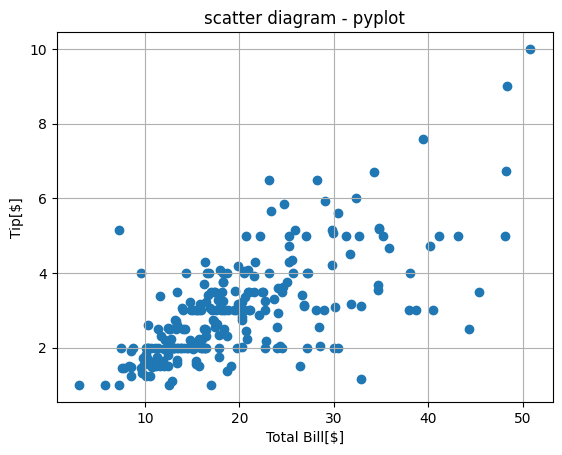

In [ ]:
plt.scatter(df_tips.total_bill,df_tips.tip)
# adding x and y labels:
plt.xlabel('Total Bill[$]')
plt.ylabel('Tip[$]')
# adding a title
plt.title('scatter diagram - pyplot')
plt.grid(True) # adding grid
# plt.show()

Seaborn:

Text(0.5, 1.05, 'scatter diagram - seaborn')

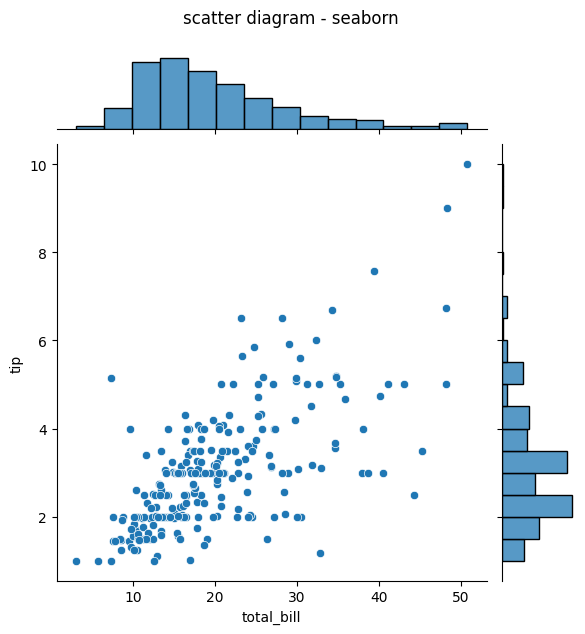

In [ ]:
sns.jointplot(data=df_tips, x="total_bill", y="tip")
plt.suptitle('scatter diagram - seaborn', y=1.05)

### Step 5. Draw a boxplot showing the gender distribution of the tip ratio to account size.

There are two ways to create the desired boxplot.
1. Create a **new dataframe** with the desired data and use the syntax:

  sns.boxplot(data=**df_tips_new**, x=**'sex'**,y=**'ratio'**)
  
or

  
2. Using the **original** dataframe and the following syntax:

  sns.boxplot(x=**df_tips["sex"]**,y=**df_tips["tip"]/df_tips["total_bill"]**)

Please keep in mind that in order to generate a vertical boxplot with nested grouping by two variables, we will add a hue variable without modifying the box width or position (dodge=False).




###Option A: creating a **new dataframe**

In [ ]:
df_tips_new = df_tips[['total_bill','tip', 'sex']].copy()
df_tips_new

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.00,Female
241,22.67,2.00,Male
242,17.82,1.75,Male


adding a new column to the datafrme with the wanted ratio

In [ ]:
df_tips_new['ratio'] = df_tips_new["tip"]/df_tips_new["total_bill"]
df_tips_new

,total_bill,tip,sex,ratio
0,16.99,1.01,Female,0.059447
1,10.34,1.66,Male,0.160542
2,21.01,3.50,Male,0.166587
3,23.68,3.31,Male,0.139780
4,24.59,3.61,Female,0.146808
...,...,...,...,...
239,29.03,5.92,Male,0.203927
240,27.18,2.00,Female,0.073584
241,22.67,2.00,Male,0.088222
242,17.82,1.75,Male,0.098204


Text(0.5, 0.98, 'Boxplot of tip ratio to account size gender distribution')

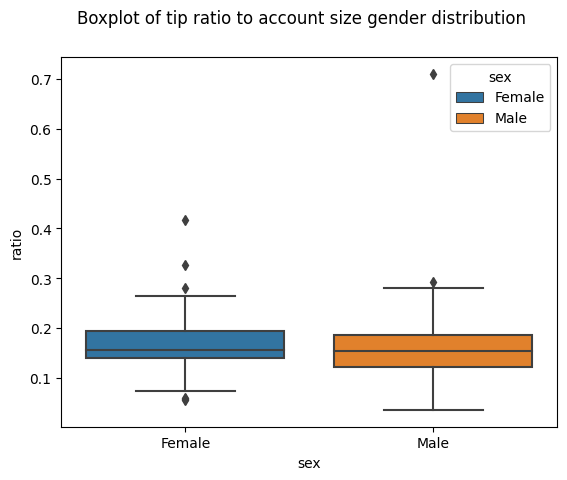

In [ ]:
sns.boxplot(data=df_tips_new, x='sex',y='ratio', hue='sex', dodge=False)
plt.suptitle('Boxplot of tip ratio to account size gender distribution') # , y=1.05

###Option B: using the **existing** dataframe

Text(0.5, 0.98, 'Gender distribution of the tip ratio to total bill')

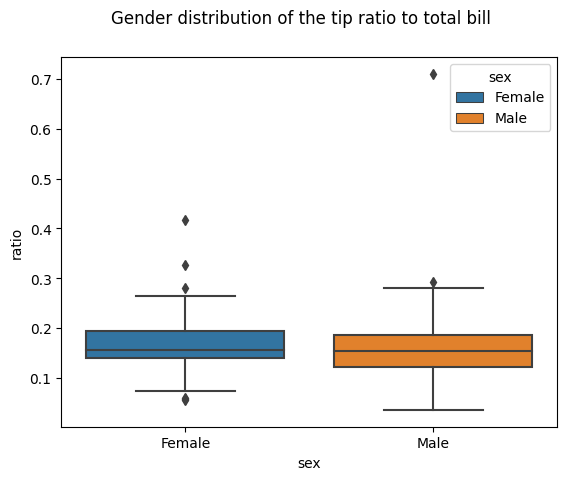

In [ ]:
#without y label named 'ratio'
# sns.boxplot(x=df_tips["sex"],y=df_tips["tip"]/df_tips["total_bill"], hue=df_tips['sex'], dodge=False)
df_tips['ratio'] = df_tips["tip"]/df_tips["total_bill"] #for adding y label named 'ratio'
sns.boxplot(x=df_tips["sex"],y=df_tips["ratio"], hue=df_tips['sex'], dodge=False)
plt.suptitle('Gender distribution of the tip ratio to total bill')


### Step 6. Create a histogram of the account's balance.

Text(0.5, 0.98, 'Accounts balance')

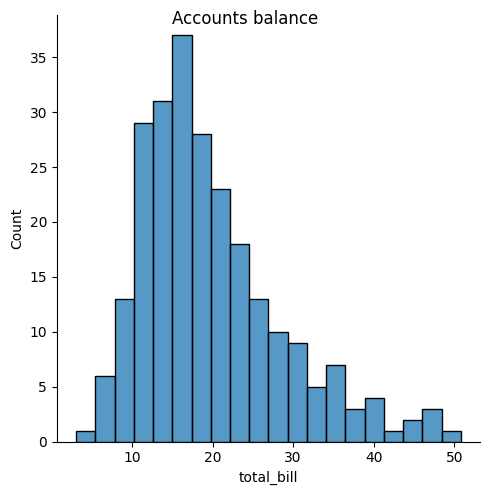

In [ ]:
sns.displot(df_tips, x="total_bill", bins=20)
plt.suptitle('Accounts balance')
# or
# sns.displot(df_tips['total_bill'], bins=20)

### Step 7. Generate a single image that displays the distribution of each total bill, tip, and size, as well as the relationships between them (search for the appropriate phone number in seaborn).


The appropriate phone number in seaborn is pairplot

Text(0.5, 1.05, 'pairwise relationships in the tip dataset')

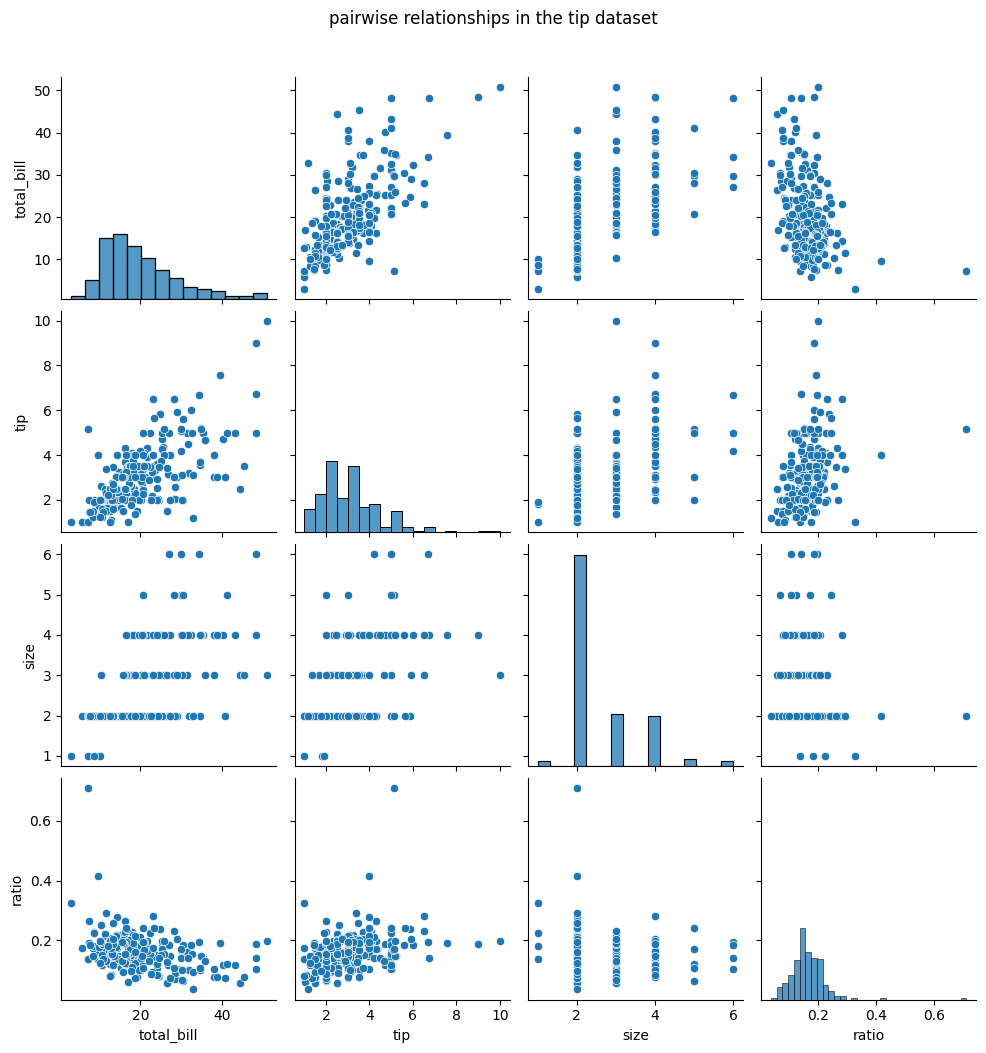

In [ ]:
sns.pairplot(df_tips)
plt.suptitle('pairwise relationships in the tip dataset', y=1.05)

### Step 8. Display the distribution of the bill's amount based on the days of the week.

Text(0.5, 1.05, 'distribution of the bills amount based on the days of the week')

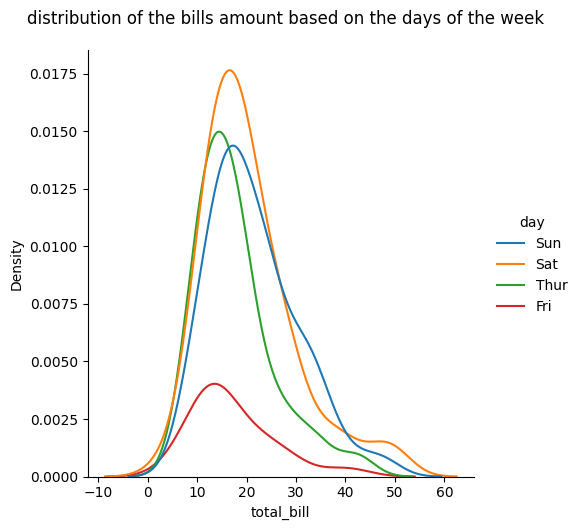

In [ ]:
sns.displot(df_tips, x="total_bill", hue="day", kind="kde")
plt.suptitle('distribution of the bills amount based on the days of the week', y=1.05)

Distribution using a histogram:

<ipython-input-73-bef4fc96cea3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_tips, x='day', y='total_bill', hue="day",dodge=False, estimator=sum, ci=None)


Text(0.5, 0.98, 'distribution of the bills amount based on the days of the week')

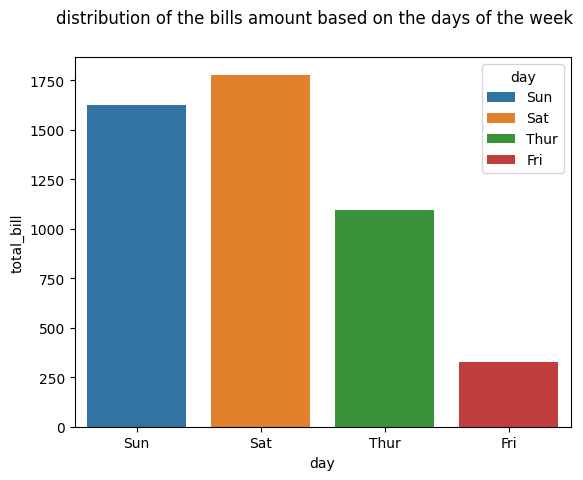

In [ ]:
sns.barplot(data=df_tips, x='day', y='total_bill', hue="day",dodge=False, estimator=sum, ci=None)
plt.suptitle('distribution of the bills amount based on the days of the week')

### Step 9. Make a scatter plot with the x-axis being the height of the tip and the y-axis being the days of the week.

###Option A

Text(0.5, 1.05, 'Tip height versus weekdays')

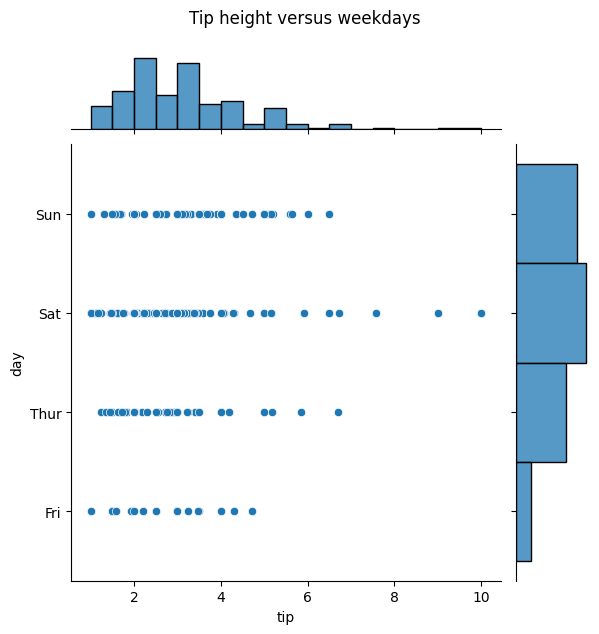

In [ ]:
sns.jointplot(data=df_tips,x="tip",y="day")
plt.suptitle('Tip versus weekdays', y= 1.05)

###Option B

Text(0.5, 1.05, 'Tip versus weekdays')

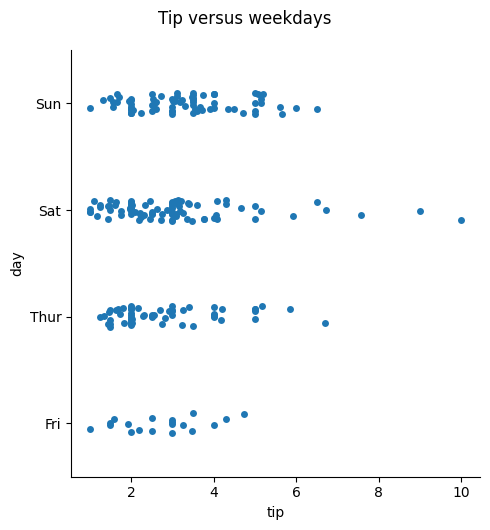

In [ ]:
sns.catplot( data=df_tips, x="tip", y="day")
plt.suptitle('Tip versus weekdays', y= 1.05)

### Step 10. Display the distribution of the bill's amount based on the days of the week and the type of meal using a boxplot.

####Option A

Text(0.5, 0.98, 'Bills based on the days of the week and the type of meal ')

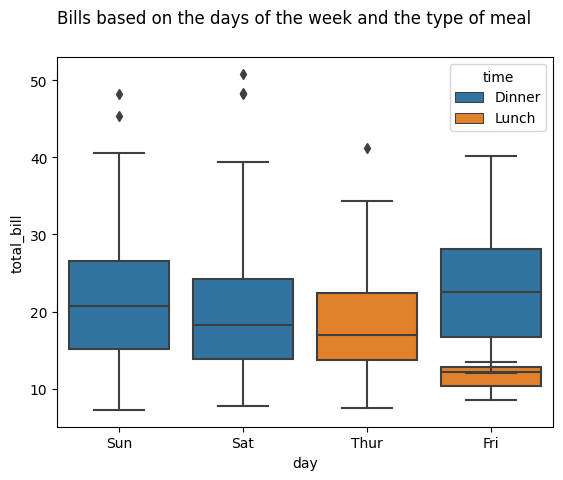

In [ ]:
sns.boxplot(data=df_tips, x='day', y='total_bill', hue='time', dodge=False)
plt.suptitle('Bills based on the days of the week and the type of meal ')

####Option B

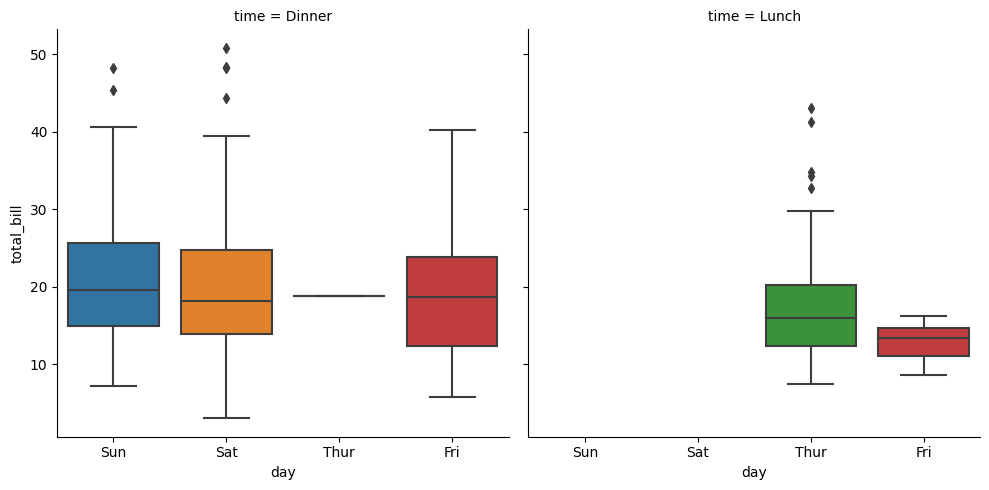

In [ ]:
sns.catplot(data=df_tips, x="day", y="total_bill", col="time", kind="box")

### Step 11. Create two histograms, one next to the other, with the tip distribution based on the type of meal.

####Option A

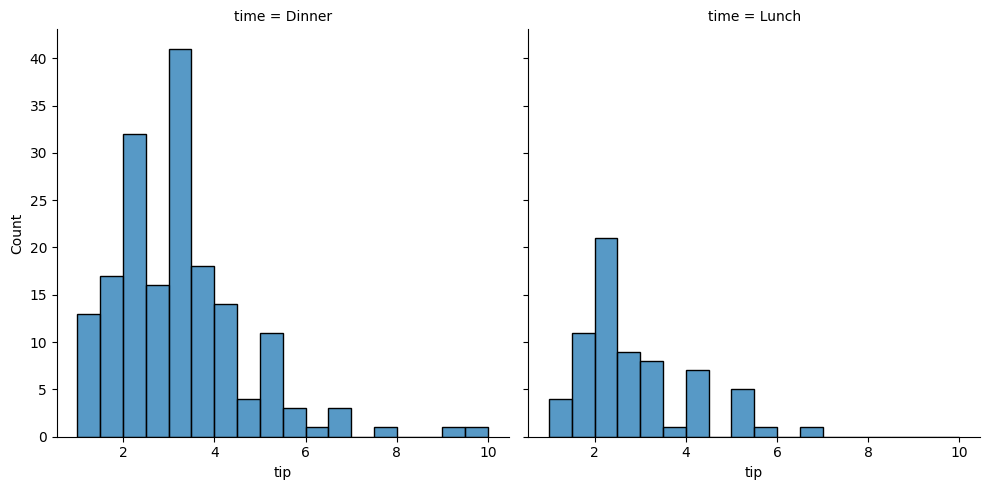

In [ ]:
sns.displot(df_tips, x="tip", col="time")

####Option B
Use the kind parameter to select a different representation:

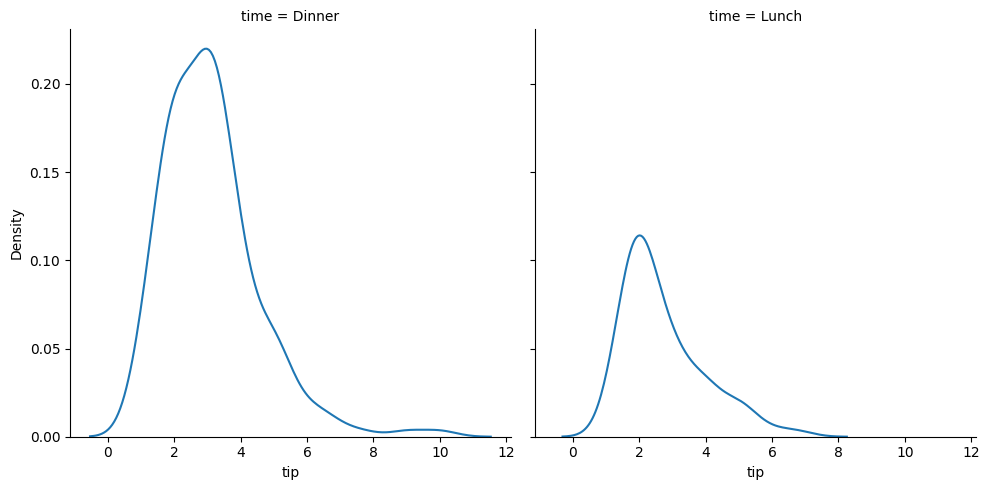

In [ ]:
sns.displot(df_tips, x="tip", col="time", kind="kde")

### Step 12. Provide a separate scatter diagram for men of the amount of the bill in proportion to the tip, with the color of the dots indicating whether the customer is a smoker or not

####Option A

In [ ]:
Ma=df_tips.groupby(["sex"]).get_group("Male")
Ma

,total_bill,tip,sex,smoker,day,time,size,ratio
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.079365
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222


Text(0.5, 0.98, 'Males only')

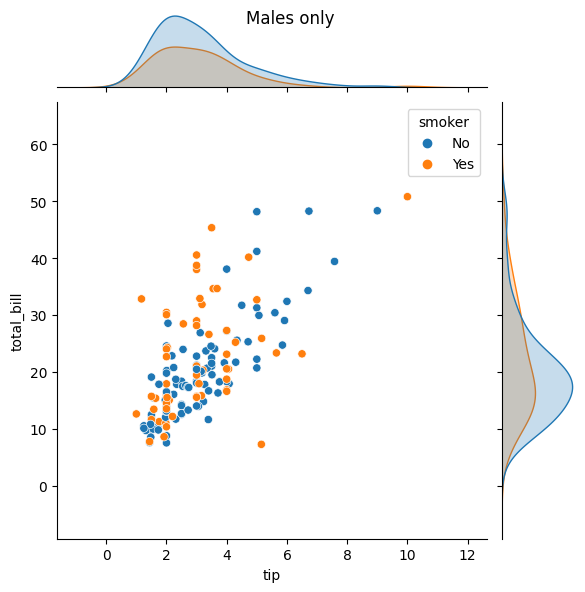

In [ ]:
sns.jointplot(x=Ma["tip"], y=Ma["total_bill"],hue=Ma["smoker"])
plt.suptitle('Males only')

####Option B

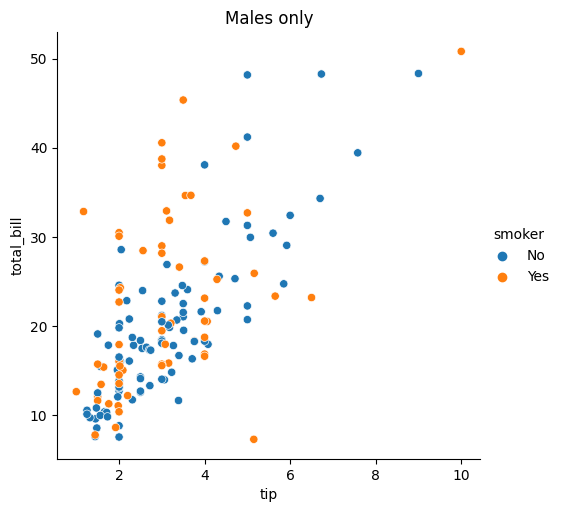

In [ ]:
tips_male = df_tips
tips_male.drop(tips_male[tips_male['sex'] == 'Female'].index, inplace = True)

sns.relplot(x="tip", y="total_bill", hue="smoker", data=tips_male).set(title='Males only')